In [2]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Figure 1B: ROC example

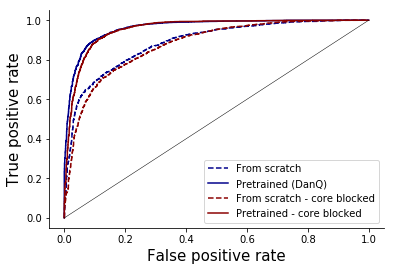

In [37]:
factor = "SP1"

scratch_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-from-scratch/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/lable-logit.txt"%factor
pretrain_danq_f = "/storage/pandaman/project/AgentBind-GM12878-DanQ-fixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/c/%s+GM12878/lable-logit.txt"%factor
scratch_f_b = "/storage/pandaman/project/AgentBind-GM12878-DanQ-from-scratch/storage/AgentBind-GM12878-DanQ/results/b/%s+GM12878/lable-logit.txt"%factor
pretrain_danq_f_b = "/storage/pandaman/project/AgentBind-GM12878-DanQ-fixed-rnn-trans/storage/AgentBind-GM12878-DanQ/results/b/%s+GM12878/lable-logit.txt"%factor

scratch = pd.read_csv(scratch_f, sep="\t", names=["label","score"])
pretrain_danq = pd.read_csv(pretrain_danq_f, sep="\t", names=["label","score"])
scratch_b = pd.read_csv(scratch_f_b, sep="\t", names=["label","score"])
pretrain_danq_b = pd.read_csv(pretrain_danq_f_b, sep="\t", names=["label","score"])

fpr_scratch, tpr_scratch, thresholds_scratch = roc_curve(scratch["label"], scratch["score"])
fpr_pre_danq, tpr_pre_danq, thresholds_pre_danq = roc_curve(pretrain_danq["label"], pretrain_danq["score"])
fpr_scratch_b, tpr_scratch_b, thresholds_scratch_b = roc_curve(scratch_b["label"], scratch_b["score"])
fpr_pre_danq_b, tpr_pre_danq_b, thresholds_pre_danq_b = roc_curve(pretrain_danq_b["label"], pretrain_danq_b["score"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr_scratch, tpr_scratch, color="darkblue", linestyle="dashed", label="From scratch");
ax.plot(fpr_pre_danq, tpr_pre_danq, color="darkblue", label="Pretrained (DanQ)");
ax.plot(fpr_scratch_b, tpr_scratch_b, color="darkred", linestyle="dashed", label="From scratch - core blocked");
ax.plot(fpr_pre_danq_b, tpr_pre_danq_b, color="darkred", label="Pretrained - core blocked");
ax.plot([0,1],[0,1], color="black", linewidth=0.5)
ax.legend(loc="lower right")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("False positive rate", size=15);
ax.set_ylabel("True positive rate", size=15);

fig.savefig("example_roc_%s+GM12878.pdf"%factor)

# Figure 1C: IMPACT comparison

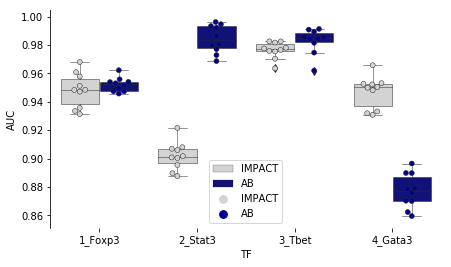

In [14]:
scores = {
    "1_Foxp3-IMPACT": [],
    "1_Foxp3-AB": [],
    "2_Stat3-IMPACT": [],
    "2_Stat3-AB": [],
    "3_Tbet-IMPACT": [],
    "3_Tbet-AB": [],
    "4_Gata3-IMPACT": [],
    "4_Gata3-AB": [],
}

num = 10
for i in range(1, num+1):
    sumdata = pd.read_csv("/storage/pandaman/project/AgentBind-IMPACT/results-c%s/c/auc_summary.txt"%i, names=["TF","AB","IMPACT"], sep="\t")
    for j in range(sumdata.shape[0]):
        tf = sumdata["TF"].values[j]
        ab = sumdata["AB"].values[j]
        if tf == "Foxp3": tf = "1_Foxp3"
        if tf == "Stat3": tf = "2_Stat3"
        if tf == "Tbet": tf = "3_Tbet"
        if tf == "Gata3": tf = "4_Gata3"
        im = sumdata["IMPACT"].values[j]
        scores[tf+"-IMPACT"].append(im)
        scores[tf+"-AB"].append(ab)

# My scores for IMPACT were wrong
scores["1_Foxp3-IMPACT"] = [0.9484 ,   0.9471   , 0.9483 ,   0.9512,    0.9357  ,  0.9313 ,   0.968    ,0.9578 ,   0.9608   , 0.9335]
scores["4_Gata3-IMPACT"] = [0.9319,    0.9526  ,  0.9499 ,   0.9308 ,   0.9657 ,   0.9481  ,  0.9504  ,  0.9522,    0.9332 ,   0.9531]
scores["2_Stat3-IMPACT"] = [0.8897 ,   0.9008   , 0.908   , 0.906   , 0.8877  ,  0.8955   , 0.9069 ,   0.9017   , 0.9216 ,   0.9004]
scores["3_Tbet-IMPACT"] = [0.978 ,   0.9825  ,  0.9765 ,   0.9817  ,  0.9758  ,  0.9635  ,  0.9825  ,  0.9703 ,   0.9775,    0.9754]
idata = pd.DataFrame({
    "TF": (["1_Foxp3"]*num+["4_Gata3"]*num+["2_Stat3"]*num+["3_Tbet"]*num)*2,
    "Trial": (list(range(1, num+1))*4)*2,
    "method": ["IMPACT"]*4*num+["AB"]*4*num,
    "AUC": scores["1_Foxp3-IMPACT"]+scores["4_Gata3-IMPACT"]+scores["2_Stat3-IMPACT"]+scores["3_Tbet-IMPACT"] + \
        scores["1_Foxp3-AB"]+scores["4_Gata3-AB"]+scores["2_Stat3-AB"]+scores["3_Tbet-AB"]
})
idata = idata.sort_values("TF")

pal = {"IMPACT": "lightgray", "AB": "darkblue"}
fig = plt.figure()
fig.set_size_inches((7, 4))
ax = fig.add_subplot(111)
sns.swarmplot(x="TF", y="AUC", hue="method", data=idata, ax=ax, \
             palette=pal, split=True, linewidth=0.5, edgecolor='gray')
sns.boxplot(x="TF", y="AUC", hue="method", data=idata, ax=ax, \
            palette=pal, linewidth=0.5)

ax.legend(loc="lower center");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');
fig.savefig("IMPACT_vs_AB.pdf")

In [15]:
!pwd

/home/mgymrek/workspace/agent-bind-analyses/Figures
